In [145]:
import numpy as np 
import matplotlib.pyplot as plt 
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
%matplotlib inline

In [146]:
np.random.seed(42)

In [147]:

def f_x(xx1,xx2):

    m = np.array([0, 0.5, -0.5])

    return (1/(2*np.pi))*(np.exp(-0.5*((xx1 - m[0])**2 + (xx2 - m[0])**2)) + 
                          np.exp(-0.5*((xx1 - m[1])**2 + (xx2 - m[1])**2)) + 
                          np.exp(-0.5*((xx1 - m[2])**2 + (xx2 - m[2])**2)))

def generate_array(size=100):

    n = np.linspace(-10,10, size)
    x1, x2 = np.meshgrid(n,n)

    X1 = np.ravel(x1)
    X2 = np.ravel(x2)
    Z = f_x(X1,X2)

    dt = np.c_[X1,X2]
    dt = np.c_[dt, Z]
    np.random.shuffle(dt)
    return dt

In [148]:
from keras import models, layers

In [149]:
dt_train = generate_array(100)
dt_val = generate_array(50)

#in_array, out_array = dt[:,:2], dt[:,2]

#X_train, Y_train = in_array[:7500], out_array[:7500]
X_train, Y_train = dt_train[:,:2], dt_train[:,2]
#X_val, Y_val = in_array[7500:], out_array[7500:]
X_val, Y_val = dt_val[:,:2], dt_val[:,2]

net = models.Sequential()
net.add(layers.Dense(8, activation='tanh', input_shape=(2,)))
net.add(layers.Dense(8, activation='tanh'))
net.add(layers.Dense(1))

net.compile(optimizer='rmsprop', loss='mse', metrics=['mse'])
print("Fitting")
history = net.fit(X_train, Y_train, epochs=15, batch_size=10, validation_data=(X_val, Y_val), verbose=0)
print("Finished")

Fitting
Finished


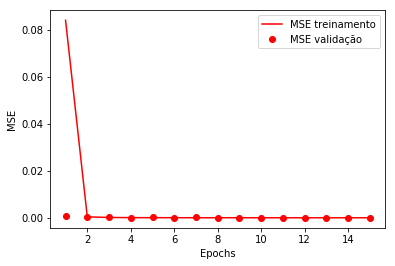

In [150]:
loss = history.history['loss']
val_loss = history.history["val_loss"]

acc = history.history['mean_squared_error']
val_acc = history.history['val_mean_squared_error']

epochs = range(1, len(loss)+1)

#fig, (ax1, ax2) = plt.subplots(2,1)
plt.figure()
# ax1.plot(epochs, loss, 'b-', label='Training loss')
# ax1.plot(epochs, val_loss, 'bo', label='Validation loss')
# ax1.set_xlabel('Epochs')
# ax1.set_ylabel('Loss')
# ax1.legend()

plt.plot(epochs, acc, 'r-', label='MSE treinamento')
plt.plot(epochs, val_acc, 'ro', label='MSE validação')
plt.xlabel('Epochs')
plt.ylabel('MSE')
plt.legend()

plt.savefig('/home/dan/redes_neuraisfig_7c_epochs.png')
plt.show()

### Predicting

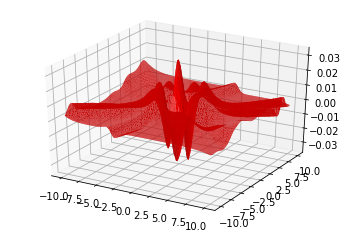

In [151]:
pred = net.predict(X_train)

size=100
np.savetxt("result_7c.csv", np.c_[dt_train, pred], delimiter=',')

dimen = int(np.sqrt(len(X_train)))
fig = plt.figure()

ax = fig.gca(projection='3d')
# ax.plot_trisurf(dt_train[:,0], dt_train[:,1], Y_train, alpha=0.5,color='b')
# plt.savefig('7c_original.png')

# ax.plot_trisurf(dt_train[:,0], dt_train[:,1], pred.reshape(10000,),alpha=0.7,color='r')
# plt.savefig('7c_pred.png')

# ax = fig.gca(projection='3d')
# ax.plot_trisurf(dt_train[:,0], dt_train[:,1], Y_train, alpha=0.5,color='b')
# plt.savefig('7c_original.png')

ax.plot_trisurf(dt_train[:,0], dt_train[:,1], pred.reshape(10000,) - Y_train,color='r')
plt.savefig('7c_pred.png')

plt.show()